# 1.Load the data

In [55]:
import requests
import pandas as pd

BASE_URL = "https://dummyjson.com/users"
MAX_USERS = 100

def fetch_users(limit):
    response = requests.get(BASE_URL, params={"limit": limit})
    response.raise_for_status()
    return response.json()["users"]

users = fetch_users(MAX_USERS)

df = pd.json_normalize(users)
df.to_csv("users.csv", index=False)

print(df)


     id firstName  lastName maidenName  age  gender  \
0     1     Emily   Johnson      Smith   29  female   
1     2   Michael  Williams              36    male   
2     3    Sophia     Brown              43  female   
3     4     James     Davis              46    male   
4     5      Emma    Miller    Johnson   31  female   
..  ...       ...       ...        ...  ...     ...   
95   96    Aurora    Lawson              27  female   
96   97     Oscar    Powers              34    male   
97   98     Clara     Berry              31  female   
98   99     Gavin   Stanley              33    male   
99  100      Lila    Hudson              28  female   

                               email             phone  username  \
0      emily.johnson@x.dummyjson.com  +81 965-431-3024    emilys   
1   michael.williams@x.dummyjson.com  +49 258-627-6644  michaelw   
2       sophia.brown@x.dummyjson.com  +81 210-652-2785   sophiab   
3        james.davis@x.dummyjson.com  +49 614-958-9364    jamesd   

# 2. Basic Data Exploration

In [56]:
# df shape
df.shape

(100, 52)

In [57]:
# df columns
df.columns

Index(['id', 'firstName', 'lastName', 'maidenName', 'age', 'gender', 'email',
       'phone', 'username', 'password', 'birthDate', 'image', 'bloodGroup',
       'height', 'weight', 'eyeColor', 'ip', 'macAddress', 'university', 'ein',
       'ssn', 'userAgent', 'role', 'hair.color', 'hair.type',
       'address.address', 'address.city', 'address.state', 'address.stateCode',
       'address.postalCode', 'address.coordinates.lat',
       'address.coordinates.lng', 'address.country', 'bank.cardExpire',
       'bank.cardNumber', 'bank.cardType', 'bank.currency', 'bank.iban',
       'company.department', 'company.name', 'company.title',
       'company.address.address', 'company.address.city',
       'company.address.state', 'company.address.stateCode',
       'company.address.postalCode', 'company.address.coordinates.lat',
       'company.address.coordinates.lng', 'company.address.country',
       'crypto.coin', 'crypto.wallet', 'crypto.network'],
      dtype='object')

In [58]:
# data columns types
df.dtypes

id                                   int64
firstName                           object
lastName                            object
maidenName                          object
age                                  int64
gender                              object
email                               object
phone                               object
username                            object
password                            object
birthDate                           object
image                               object
bloodGroup                          object
height                             float64
weight                             float64
eyeColor                            object
ip                                  object
macAddress                          object
university                          object
ein                                 object
ssn                                 object
userAgent                           object
role                                object
hair.color 

In [59]:
# missing values
df.isnull().sum()

id                                 0
firstName                          0
lastName                           0
maidenName                         0
age                                0
gender                             0
email                              0
phone                              0
username                           0
password                           0
birthDate                          0
image                              0
bloodGroup                         0
height                             0
weight                             0
eyeColor                           0
ip                                 0
macAddress                         0
university                         0
ein                                0
ssn                                0
userAgent                          0
role                               0
hair.color                         0
hair.type                          0
address.address                    0
address.city                       0
a

In [60]:
# duplicate data
df.duplicated().sum()

np.int64(0)

In [61]:
# summary stats
df.describe()

,id,age,height,weight,address.coordinates.lat,address.coordinates.lng,company.address.coordinates.lat,company.address.coordinates.lng
count,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,31.700000,176.392500,75.0431,0.304661,-8.426883,3.300877,-10.039483
std,29.011492,4.132893,13.838342,14.0146,52.833371,105.246649,51.892119,102.017108
min,1.000000,23.000000,150.250000,50.1000,-87.184494,-176.861979,-86.557025,-169.602231
25%,25.750000,28.750000,166.700000,63.0075,-46.076624,-87.475943,-47.014297,-91.900357
50%,50.500000,31.000000,178.320000,75.4600,3.090987,-27.686222,11.113367,-12.890487
75%,75.250000,34.000000,187.617500,87.5175,42.178338,81.048713,45.542705,83.312120
max,100.000000,46.000000,199.620000,98.7700,89.781211,179.922909,89.270633,178.506028


In [62]:
# value counts(cateogrial columns)
df['gender'].value_counts()

gender
female    52
male      48
Name: count, dtype: int64

In [63]:
df['bloodGroup'].value_counts()

bloodGroup
O-     19
A+     15
AB-    13
AB+    13
B+     12
B-     10
O+     10
A-      8
Name: count, dtype: int64

In [44]:
df['eyeColor'].value_counts()

eyeColor
Brown     18
Hazel     16
Gray      14
Red       12
Blue      12
Green     11
Amber     10
Violet     7
Name: count, dtype: int64

In [45]:
df['role'].value_counts()

role
user         85
moderator    10
admin         5
Name: count, dtype: int64

In [46]:
df['address.country'].value_counts()

address.country
United States    100
Name: count, dtype: int64

# 3. Data cleaning / prepartion (if needed)

In [47]:
df.drop("maidenName", axis=1, inplace=True)
df.tail(3)

,id,firstName,lastName,age,gender,email,phone,username,password,birthDate,image,bloodGroup,height,weight,eyeColor,ip,macAddress,university,ein,ssn,userAgent,role,hair.color,hair.type,address.address,address.city,address.state,address.stateCode,address.postalCode,address.coordinates.lat,address.coordinates.lng,address.country,bank.cardExpire,bank.cardNumber,bank.cardType,bank.currency,bank.iban,company.department,company.name,company.title,company.address.address,company.address.city,company.address.state,company.address.stateCode,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.wallet,crypto.network
97,98,Clara,Berry,31,female,clara.berry@x.dummyjson.com,+1 390-831-5172,clarab,clarabpass,1994-2-13,https://dummyjson.com/icon/clarab/128,O-,151.55,90.27,Red,144.153.81.107,30:fa:b2:ca:17:91,Boston College,246-495,625-638-955,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Blue,Wavy,1577 Jefferson Street,Seattle,Montana,MT,41818,88.607515,92.692781,United States,10/29,348500223799446,American Express,JPY,DE94679076797491453575,Training,Mayer - Smitham,Accountant,767 Adams Street,Phoenix,Washington,WA,13037,76.372465,24.919329,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
98,99,Gavin,Stanley,33,male,gavin.stanley@x.dummyjson.com,+44 466-358-6026,gavins,gavinspass,1992-3-17,https://dummyjson.com/icon/gavins/128,O-,173.37,92.17,Amber,189.110.169.3,34:32:b0:9:28:0,University of California--Irvine,780-590,321-561-524,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Black,Straight,1898 Second Street,Houston,Mississippi,MS,85234,70.915423,-30.195987,United States,03/27,3581201445671725,JCB,CAD,DE01439050186894663094,Marketing,"Strosin, Anderson and Baumbach",Support Specialist,903 First Street,San Diego,Iowa,IA,87476,-47.007951,86.840506,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
99,100,Lila,Hudson,28,female,lila.hudson@x.dummyjson.com,+91 697-236-1544,lilah,lilahpass,1997-9-1,https://dummyjson.com/icon/lilah/128,AB+,190.10,70.03,Gray,96.35.42.117,96:21:23:2c:f:d5,University of Notre Dame,306-959,297-645-204,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Blonde,Wavy,262 Ninth Street,Chicago,Nevada,NV,17472,-68.233207,-67.042550,United States,12/29,3573611722474066,JCB,EUR,DE23981874800457879322,Legal,"Hartmann, Hilpert and Kulas",Sales Manager,1825 Oak Street,New York,Kansas,KS,71983,50.551530,39.433391,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)


In [21]:
df.drop(["company.address.stateCode","crypto.wallet","company.address.postalCode","bank.iban","macAddress","userAgent","address.postalCode","address.stateCode"], axis=1, inplace=True)


In [65]:
df.sample(10)

,id,firstName,lastName,maidenName,age,gender,email,phone,username,password,birthDate,image,bloodGroup,height,weight,eyeColor,ip,macAddress,university,ein,ssn,userAgent,role,hair.color,hair.type,address.address,address.city,address.state,address.stateCode,address.postalCode,address.coordinates.lat,address.coordinates.lng,address.country,bank.cardExpire,bank.cardNumber,bank.cardType,bank.currency,bank.iban,company.department,company.name,company.title,company.address.address,company.address.city,company.address.state,company.address.stateCode,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.wallet,crypto.network
44,45,Lincoln,Kelly,,31,male,lincoln.kelly@x.dummyjson.com,+49 680-666-9673,lincolnk,lincolnkpass,1994-1-12,https://dummyjson.com/icon/lincolnk/128,A+,191.01,73.38,Amber,82.138.239.3,f6:3c:e7:3b:d6:40,Yale University,761-657,439-236-645,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,White,Straight,108 Adams Street,Columbus,Montana,MT,51083,59.268321,-30.466022,United States,06/27,376869242043473,American Express,EUR,ES6553771897122276945739,Research and Development,Johnson and Sons,Legal Counsel,1794 Elm Street,Houston,North Dakota,ND,78494,52.096422,178.506028,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
58,59,Ethan,Fletcher,,34,male,ethan.fletcher@x.dummyjson.com,+1 251-564-2643,ethanf,ethanfpass,1991-5-1,https://dummyjson.com/icon/ethanf/128,AB-,183.99,83.98,Violet,21.94.6.7,b2:fd:ca:1b:3b:a5,Cornell University,610-786,577-991-233,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,user,Brown,Curly,789 Main Street,Dallas,Arkansas,AR,87924,29.411519,23.598322,United States,02/27,4440217612919449,Visa,AUD,DE42359669771256255400,Training,Halvorson LLC,Data Scientist,258 Tenth Street,Washington,Texas,TX,10371,45.367618,-147.524292,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
69,70,Zoe,Nicholson,,33,female,zoe.nicholson@x.dummyjson.com,+49 638-976-6904,zoen,zoenpass,1992-12-24,https://dummyjson.com/icon/zoen/128,A+,177.34,56.28,Hazel,162.232.212.187,42:fa:3e:8:22:1f,University of Miami,107-293,447-330-498,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,user,Red,Wavy,1705 Pine Street,Jacksonville,Kansas,KS,39449,35.632082,127.968158,United States,03/29,3572305898329375,JCB,PKR,DE17822765864402242705,Human Resources,Marks LLC,Research Analyst,381 Madison Street,Jacksonville,New Hampshire,NH,30926,-32.970666,111.725715,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
20,21,Madison,Collins,,27,female,madison.collins@x.dummyjson.com,+81 259-957-5711,madisonc,madisoncpass,1998-3-7,https://dummyjson.com/icon/madisonc/128,B-,189.28,56.96,Red,85.34.1.204,13:b0:d0:23:4d:26,University of Pennsylvania,716-166,457-258-950,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,user,Gray,Curly,1892 Lincoln Street,Philadelphia,New Jersey,NJ,62091,52.993694,160.486892,United States,09/27,5551259848327064,Mastercard,EUR,ES3893300143587765232049,Engineering,Mayer - Smitham,Chief Technology Officer,1438 Main Street,San Diego,Delaware,DE,63144,1.629613,23.232982,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
65,66,Aria,Ferguson,,28,female,aria.ferguson@x.dummyjson.com,+44 434-406-8551,ariaf,ariafpass,1997-6-1,https://dummyjson.com/icon/ariaf/128,B+,161.81,97.12,Blue,180.24.111.167,e2:71:6d:81:6:db,Cornell University,952-671,705-592-753,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,user,Blue,Wavy,1553 Sixth Street,San Diego,Wyoming,WY,59501,-66.092723,169.995200,United States,02/28,5222769696858258,Mastercard,GBP,GB93YU9GTP9S3UJCULWWWL,Legal,"Wisozk, Schamberger and Huels",Project Manager,807 Eighth Street,Phoenix,New Jersey,NJ,75765,46.824227,-51.392185,United States,Bitcoin,0xb9fc2fe63b2a6c003f1c324c3bfa53259162181a,Ethereum (ERC20)
88,89,Brayden,Fleming,,33,male,brayden.fleming@x.dummyjson.com,+1 404-382-1778,br

In [66]:
df[['age','height','weight']].isnull().sum()

age       0
height    0
weight    0
dtype: int64

In [67]:
df['age'].fillna(df['age'].mean() , inplace = True)

C:\Users\mosta\AppData\Local\Temp\ipykernel_18688\2640674786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean() , inplace = True)


In [68]:
df['height'].fillna(df['weight'].median() , inplace=True)

C:\Users\mosta\AppData\Local\Temp\ipykernel_18688\3916902270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(df['weight'].median() , inplace=True)


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="deep")

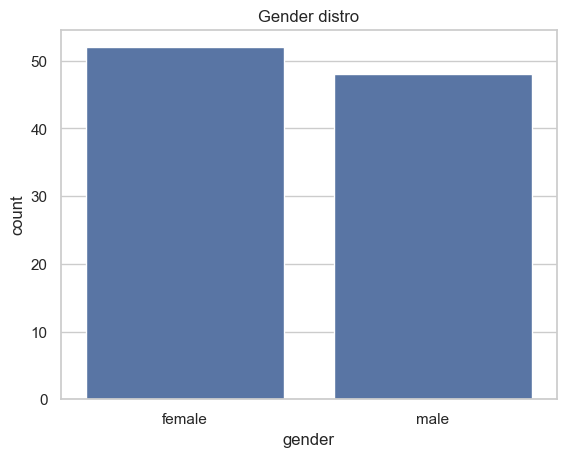

In [29]:
# average age of users
sns.countplot(x='gender' , data=df)
plt.title("Gender distro")
plt.show()

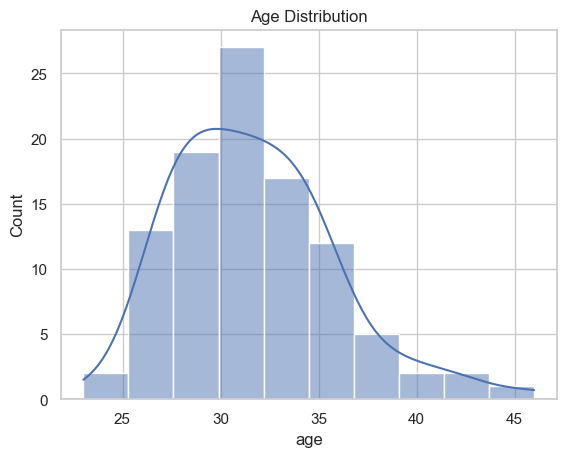

In [ ]:
sns.histplot(df['age'], bins = 10 ,kde=True)
plt.title("Age Distribution")
plt.show()

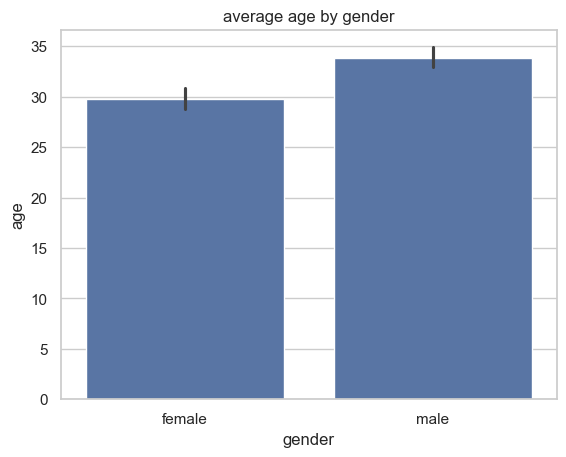

In [73]:
sns.barplot(x='gender' , y='age', data=df)
plt.title("average age by gender")
plt.show()

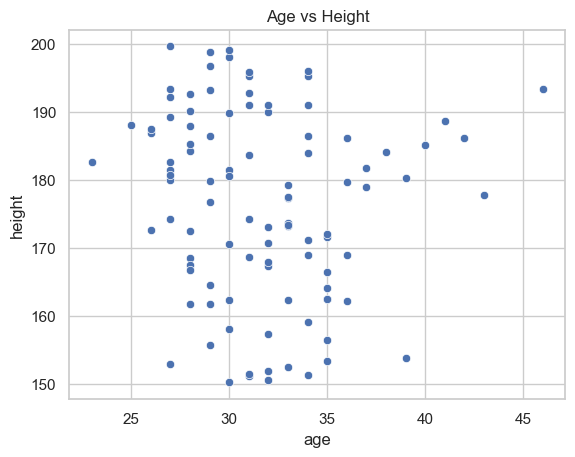

In [77]:
sns.scatterplot(x='age' , y='height' , data=df)
plt.title('Age vs Height')
plt.show()

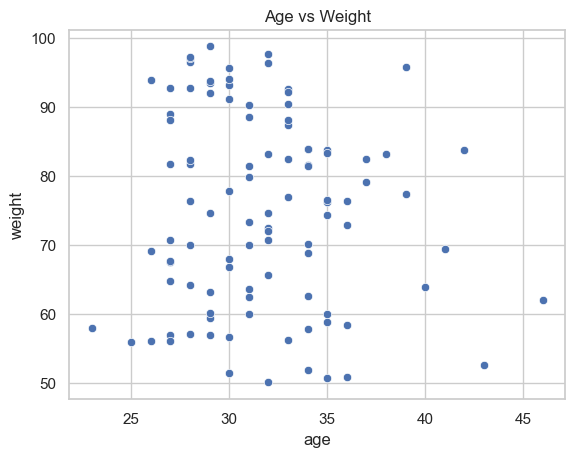

In [75]:
sns.scatterplot(x='age' , y='weight' , data=df)
plt.title("Age vs Weight")
plt.show()

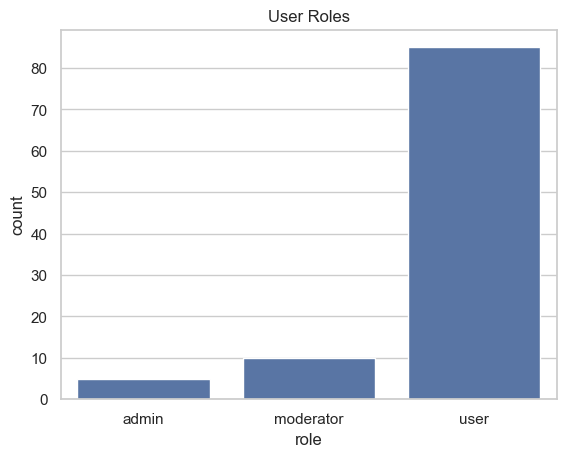

In [86]:
sns.countplot(x='role', data=df )
plt.title("User Roles")
plt.show()


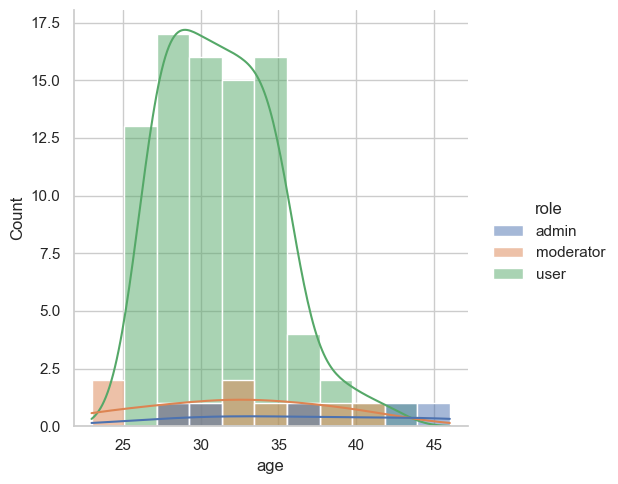

In [83]:
sns.displot(data=df , x="age" , hue="role", kde=True)